In [1]:
!pip install tensorflow
!pip install cv2

ERROR: Could not find a version that satisfies the requirement cv2 (from versions: none)
ERROR: No matching distribution found for cv2


In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models


In [3]:

(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1)).astype('float32') / 255


from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels, 10)  
test_labels = to_categorical(test_labels, 10)


model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  
])


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))


test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")


c:\Users\Gopib\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 16ms/step - accuracy: 0.7080 - loss: 0.7956 - val_accuracy: 0.8625 - val_loss: 0.3865
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.8707 - loss: 0.3545 - val_accuracy: 0.8835 - val_loss: 0.3290
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.8908 - loss: 0.2980 - val_accuracy: 0.8932 - val_loss: 0.2970
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.9020 - loss: 0.2670 - val_accuracy: 0.8862 - val_loss: 0.3143
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.9119 - loss: 0.2432 - val_accuracy: 0.9030 - val_loss: 0.2688
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.9185 - loss: 0.2216 - val_accuracy: 0.9057 - val_loss: 0.2705
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.9241 - loss: 0.2061 - val_accuracy: 0.9098 - val_loss: 0.2542
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.9313 - loss: 0.1883 - 

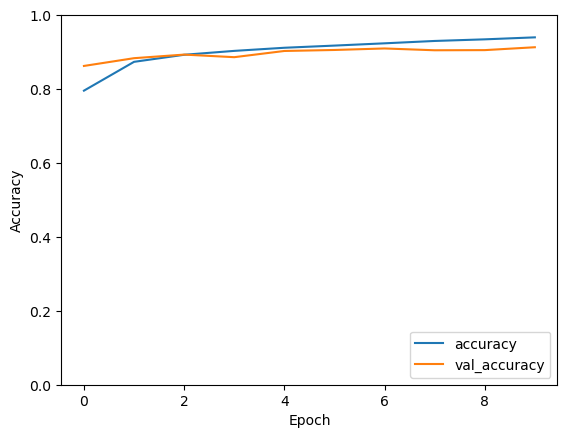

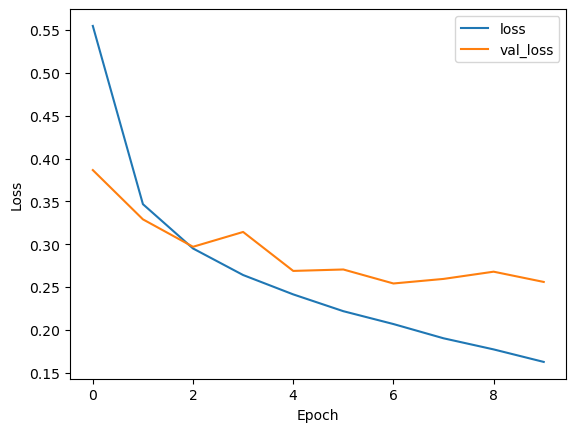

In [4]:

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()


In [5]:
pip install opencv-python


In [9]:
import cv2
import numpy as np
import tensorflow as tf


CONFIDENCE_THRESHOLD = 0.7  
GESTURE_LABELS = {
    0: 'Thumbs Up',
    1: 'Thumbs Down',
    2: 'Victory',
    3: 'No Gesture' 
}


def load_model(model_path='gesture_model.h5'):
   
    return tf.keras.models.load_model(model_path)


def preprocess_frame(frame):
    
    frame_resized = cv2.resize(frame, (28, 28)) 
    frame_gray = cv2.cvtColor(frame_resized, cv2.COLOR_BGR2GRAY)  
    frame_input = frame_gray.reshape((1, 28, 28, 1)).astype('float32') / 255.0  
    return frame_input


def predict_gesture(model, frame):
    """Predict the gesture from the given frame."""
    
    input_frame = preprocess_frame(frame)

  
    predictions = model.predict(input_frame, verbose=0)
    confidence = np.max(predictions)
    predicted_class = np.argmax(predictions)

    if confidence < CONFIDENCE_THRESHOLD:
        return 'No Gesture', confidence
    else:
        gesture_name = GESTURE_LABELS.get(predicted_class, "Unknown Gesture")
        return gesture_name, confidence


def display_prediction(frame, gesture_name, confidence):
 
    display_text = f'Gesture: {gesture_name} ({confidence:.2f})'
    cv2.putText(frame, display_text, (50, 50),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    return frame

def start_gesture_recognition(model):
 
   
    cap = cv2.VideoCapture(0)

    if not cap.isOpened():
        print("Error: Could not open webcam.")
        return

    print("Starting Hand Gesture Recognition... Press 'q' to quit.")

    while True:
      
        ret, frame = cap.read()
        if not ret:
            print("Failed to capture frame. Exiting...")
            break

        gesture_name, confidence = predict_gesture(model, frame)

        frame_with_prediction = display_prediction(frame, gesture_name, confidence)

        cv2.imshow('Hand Gesture Recognition', frame_with_prediction)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    
    cap.release()
    cv2.destroyAllWindows()


def main():
    
    model_path = 'gesture_model.h5' 
    model = load_model(model_path)  
    start_gesture_recognition(model) 

if __name__ == "__main__":
    main()


Starting Hand Gesture Recognition... Press 'q' to quit.


In [7]:

model.save('gesture_model.h5')


import tensorflow as tf
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()


with open('gesture_model.tflite', 'wb') as f:
    f.write(tflite_model)


INFO:tensorflow:Assets written to: C:\Users\Gopib\AppData\Local\Temp\tmpe9apiis1\assets


INFO:tensorflow:Assets written to: C:\Users\Gopib\AppData\Local\Temp\tmpe9apiis1\assets


Saved artifact at 'C:\Users\Gopib\AppData\Local\Temp\tmpe9apiis1'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  2660853996752: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2660853997520: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2660784498704: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2660853998288: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2660853997328: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2660853998672: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2660853996176: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2660853999056: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2660853996944: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2660853999440: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [8]:
import cv2

cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Unable to access the camera.")
else:
    print("Camera successfully opened.")


Camera successfully opened.
